# NLE Assessed Coursework 3: Question 2

For this assessment, you are expected to complete and submit 4 notebook files.  There is 1 notebook file for each question (to speed up load times).  This is notebook 2 out of 4.

Marking guidelines are provided as a separate document.

In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.

In [1]:
candidateno=215939 #this MUST be updated to your candidate number so that you get a unique data sample

In [2]:
#preliminary imports
import sys
sys.path.append('.')
sys.path.append(r"./resources")
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.tokenize import word_tokenize
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
from sussex_nltk.corpus_readers import ReutersCorpusReader
import random
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import math

def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    tokenlist=["NUM" if token.isdigit() else token for token in tokenlist]
    tokenlist=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in tokenlist]
    tokenlist=["NUM" if re.search("^[+-]?[0-9]+\.[0-9]",token) else token for token in tokenlist]
    return tokenlist



[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\piter\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piter\AppData\Roaming\nltk_data...


Sussex NLTK root directory is ./resources


[nltk_data]   Package punkt is already up-to-date!


## Question 2: Distributional Semantics (25 marks)


In [3]:
rcr = ReutersCorpusReader().finance()
rcr.enumerate_sents()

1113359

def sample_from_corpus(corpus,sample_size):
    n = corpus.enumerate_sents()
    sample_indices = set(random.sample(xrange(n),sample_size))
    return [sent for i,sent in enumerate(corpus.sents()) if i in sample_indices]

In [4]:
random.seed(candidateno)  
print (candidateno)
samplesize=2000
iterations =100
sentences=[]
datas=[]
for i in range(0,iterations):
    sentences+=[normalise(sent) for sent in rcr.sample_sents(samplesize=samplesize)]
    #datas +=[sent for sent in rcr.sample_sents(samplesize=samplesize)]
    print("Completed {}%".format(i))
print("Completed 100%")

215939
Completed 0%
Completed 1%
Completed 2%
Completed 3%
Completed 4%
Completed 5%
Completed 6%
Completed 7%
Completed 8%
Completed 9%
Completed 10%
Completed 11%
Completed 12%
Completed 13%
Completed 14%
Completed 15%
Completed 16%
Completed 17%
Completed 18%
Completed 19%
Completed 20%
Completed 21%
Completed 22%
Completed 23%
Completed 24%
Completed 25%
Completed 26%
Completed 27%
Completed 28%
Completed 29%
Completed 30%
Completed 31%
Completed 32%
Completed 33%
Completed 34%
Completed 35%
Completed 36%
Completed 37%
Completed 38%
Completed 39%
Completed 40%
Completed 41%
Completed 42%
Completed 43%
Completed 44%
Completed 45%
Completed 46%
Completed 47%
Completed 48%
Completed 49%
Completed 50%
Completed 51%
Completed 52%
Completed 53%
Completed 54%
Completed 55%
Completed 56%
Completed 57%
Completed 58%
Completed 59%
Completed 60%
Completed 61%
Completed 62%
Completed 63%
Completed 64%
Completed 65%
Completed 66%
Completed 67%
Completed 68%
Completed 69%
Completed 70%
Completed

In [5]:
def generate_features(sentences,window=1):
    mydict={}
    for sentence in sentences:
        for i,token in enumerate(sentence):
            current=mydict.get(token,{})
            features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]
            for feature in features:
                current[feature]=current.get(feature,0)+1
            mydict[token]=current
    return mydict

a) **Run** `generate_features(sentences[:5])`.  With reference to the code and the specific examples, **explain** how the output was generated. \[4 marks\]

In [6]:
mydict = generate_features(sentences)

#mydict['percent']

In [7]:
mydict['percent']['gap']

1

1. What is type of result fo generate_features function
  Result is a dictionay which consist of related context and count_num(value). Each of dictionay is like bellow type:
       'context_i' {'related_context1':cnt1, 'related_context2':cnt2, ...}
              ex => 'who' : {'farmers': 1, 'have': 1},
                    'invested' : {'have': 1, 'heavily': 1}
2. What is variable 'current' mean
  In each step of loops about sentence, the value 'current' changes.
          current = mydict.get(token,{})
  Among all of mydict's items, get pairs of related_context and cnt  which item's context is same as token.
              ex => {'and': 1, 'have': 1}
3. What is variable 'features' mean
  'features' contains related_context around indicated token according to 'window'.
          features=sentence[max(0,i-window):i]+sentence[i+1:i+window+1]
              ex => 'invested': 'have', 'in'
4. how the output was generated
   - Select sentence form sentences.
   - Select token from first to end of sentence.
   - Get related_context of selected token in sentence by 'window' value.
   - Check the mydict has seletced token as a context and if it is not then add new item about selected token(related_context and count).
      If mydict alread has it, update the item about selected token.

b) Write code and **find** the 100 most frequently occurring words that
* are in your sample; AND
* have at least one noun sense according to WordNet
\[ 4 marks\]

In [8]:
from nltk.corpus import wordnet
from nltk.corpus.reader import NOUN

frequencies = {} #Frequencies of tokens in text

for sentence in sentences:
    for i, token in enumerate(sentence):
        frequencies[token] = frequencies.get(token, 0) + 1

result = []

for item in frequencies.keys():
    synsets = wordnet.synsets(item , NOUN )#To detect wether item is used as noun or not. 

    if len(synsets) > 0:
        result += [[frequencies[item], item]]

result = sorted(result, key= lambda x:x[0], reverse = True)
print(result[:100])

[[56424, 'in'], [49537, 'a'], [17889, 'percent'], [15413, 'it'], [14844, 'be'], [14362, 'at'], [14204, 'pct'], [13438, 'was'], [11192, 'will'], [11054, 'he'], [11013, 'as'], [9308, 'bank'], [8956, 'year'], [8856, 'million'], [8753, 'have'], [8651, 'has'], [8621, 'may'], [8566, 'are'], [8381, 'its'], [8140, 'government'], [8115, 'an'], [7317, 'billion'], [5882, 'tax'], [5644, 'uk'], [5623, 'trade'], [5411, 'rate'], [4968, 'budget'], [4788, 'more'], [4648, 'last'], [4624, 'growth'], [4413, 'u.s.'], [4390, 'first'], [4274, 'central'], [4095, 'market'], [4051, 'price'], [3987, 'there'], [3973, 'june'], [3941, 'newsroom'], [3906, 'or'], [3857, 'state'], [3842, 'over'], [3681, 'union'], [3633, 'bonds'], [3608, 'inflation'], [3507, 'economy'], [3476, 'one'], [3471, 'no'], [3464, 'minister'], [3437, 'april'], [3364, 'prices'], [3345, 'rates'], [3326, 'week'], [3249, 'i'], [3206, 'currency'], [3181, 'can'], [3139, 'finance'], [3132, 'interest'], [3063, 'two'], [2962, 'gdp'], [2939, 'deficit'], 

c) Write code to create distributional vector representations of each word in the corpus with a parameter to specify context window size.   \[5 marks \]

In [9]:
window = 1

distributional_vector_reperesentation = [ ]

for i, item in enumerate(result):
    distributional_vector_reperesentation += [[0 for j in range(len(result))]]

    for feature in mydict[item[1]].keys():
        distributional_vector_reperesentation[-1][i] = mydict[item[1]][feature]

#print(distributional_vector_reperesentation[:10])
data_frame = pd.DataFrame({item[1]:distributional_vector_reperesentation[i] for item in result}, index = [item[1] for item in result])
data_frame

,in,a,percent,it,be,at,pct,was,will,he,...,despotism,curtailment,scrub,coating,reassessment,marat,scone,revokes,priest,trance
in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
it,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
be,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
was,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
will,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
he,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


d) Plan and carry out an investigation into the correlation between semantic similarity according to the WordNet path similarity measure and distributional similarity with different context window sizes.  You should make sure that you include a graph of how correlation varies with context window size and that you discuss your results.  \[12 marks\]

In [75]:
def jaccard(x, y, mydict):
    #This method is based on the jaccard similarity measure in which similarity between two word is the ration of
    # intersection of feature to the union.
    dict_x = mydict[x]
    dict_y = mydict[y]

    features = list(dict_y.keys()) + list(dict_x.keys())
    features = list(set(features))

    intersection = [min(dict_x.get(item, 0), dict_y.get(item, 0)) for item in features]
    union = [max(dict_x.get(item, 0), dict_y.get(item, 0)) for item in features]
    try:
        return sum(intersection) / sum(union)
    except:
        print(dict_x, dict_y, features)
result = sorted(result, key=lambda x: x[0], reverse=True)
result = result[:100]


correlations = []
window_max_size = 20

wordnet_sim_values = []
dist_sim_values = []
for window in range(1, window_max_size):
    mydict = generate_features(sentences[:500], window=window)

    # d)
    x = result[19]

    wordnet_similarity = []
    distributional_similarity = []

    print(x)

    for item in result:
        A = wordnet.synsets(x[1], NOUN)
        B = wordnet.synsets(item[1], NOUN)

        wordnet_similarity.append(wordnet.synset(A[0]._name).path_similarity(wordnet.synset(B[0]._name)))
        distributional_similarity.append(jaccard(x[1], item[1], mydict))

    wordnet_sim_values.append((sum(wordnet_similarity) / len(result) * 2))
    dist_sim_values.append((sum(distributional_similarity) / len(result)))
    #correlations += [pearsonr(wordnet_similarity, distributional_similarity)[0]]
    


[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']
[8140, 'government']


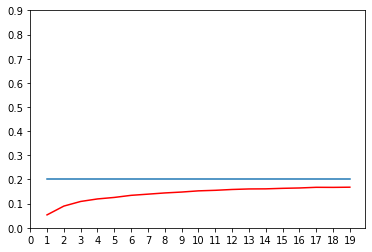

In [80]:
import numpy as np
plt.clf() 

xs = np.arange(1,window_max_size,1)
ys1 = np.array(wordnet_sim_values)
ys2 = np.array(dist_sim_values)
plt.plot(xs,ys1)
plt.plot(xs, ys2,color='red')

plt.xticks(np.arange(0,window_max_size,1))
plt.yticks(np.arange(0,1,0.1))

plt.show()